In [3]:
from PIL import Image;
import numpy as np;
import matplotlib.pyplot as plt

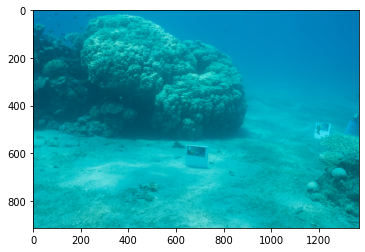

In [85]:
image = Image.open("../resources/image3_low.png")
plt.imshow(image)


In [86]:
width, height = image.size
imageArr = np.asarray(image)
imageArr.shape

(914, 1369, 3)

In [83]:
def plot_data(img, fig):
    ax = fig.add_subplot(projection='3d')
    ax.scatter(img[...,0].ravel(), 
                img[...,1].ravel(), 
                img[...,2].ravel(),
                c=img.reshape((-1,3))/255, 
                marker='.', 
                alpha=0.2)
    ax.set_xlabel("Red")
    ax.set_xlim3d(np.min(img[...,0]), np.max(img[...,0]))
    ax.set_ylabel("Green")
    ax.set_ylim3d(np.min(img[...,1]), np.max(img[...,1]))
    ax.set_zlabel("Blue")
    ax.set_zlim3d(np.min(img[...,2]), np.max(img[...,2]))
    plt.title("Color distribution of our image")

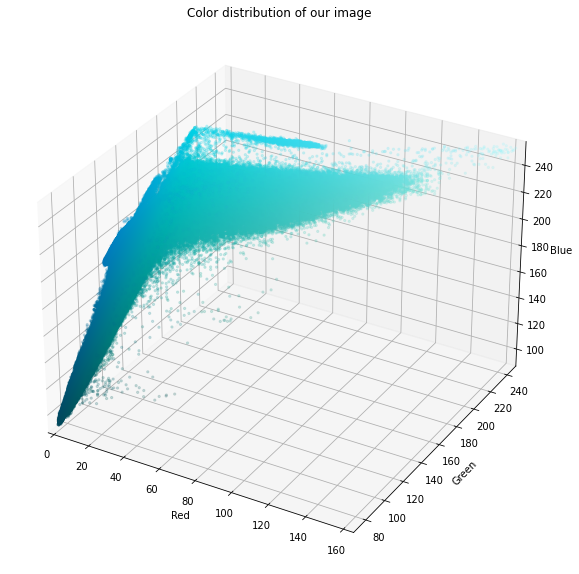

In [87]:
figure = plt.figure(figsize=(10,10))
plot_data(imageArr, figure)

In [102]:
def pickJerlovColors() :  
    image = np.asarray(Image.open("../resources/water_types.png"))[...,:3]
    height, width = image.shape[0], image.shape[1]
    deltaHeight = (int)(height / 6)
    deltaWidth = (int)(width / 20)
    colors = []
    for i in range(6):
        for j in range(20):
            colors.append(image[3+ i * deltaHeight][5 + j * deltaWidth])
    return np.array(colors)

In [ ]:
def equalF(a, b):
    return abs(a - b) < 0.001

def rgbToHsv(color):
    r = color[0]/255
    g = color[1]/255
    b = color[2]/255
    cmax = max(r, g, b)
    cmin = max(r, g, b)
    d = cmax - cmin
    h = 0
    if equalF(d, 0):
        h = 0
    if equalF(cmax, r):
        h = 60 * ((g - b)/d % 6)
    if equalF(cmax, g):
        h = 60 * ((b - r)/d + 2)
    if equalF(cmax, b):
        h = 60 * ((r - g)/d + 4)
    s = 0
    if equalF(cmax, 0):
        s = 0
    else:
        s = d / cmax
    v = cmax
    return [h, s, v]